In [2]:
#Questions to aks for the Data Set
#1. Does Lewis have better performance with Perelli or Bridgestone tires?
#2. What specific track does Lewis Particularly do well in? Which does he do poor in?
#5. Correlation between Grid position and Race position
#6. Are there trends in his performance over time?

In [5]:
#import the libraries and open the data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
LewisHamilton_Stats = pd.read_csv('lewishamilton (1).csv')
LewisHamilton_Stats

,race number,Year,grand_prix,team,driver_number,constructor,car,engine_type,tyre,grid_position,race_position,event
0,1,2007,Australia,Vodafone McLaren Mercedes,2,McLaren,MP4-22,Mercedes V8,Bridgestone,4,3,NaN
1,2,2007,Malaysia,Vodafone McLaren Mercedes,2,McLaren,MP4-22,Mercedes V8,Bridgestone,4,2,NaN
2,3,2007,Bahrain,Vodafone McLaren Mercedes,2,McLaren,MP4-22,Mercedes V8,Bridgestone,2,2,NaN
3,4,2007,Spain,Vodafone McLaren Mercedes,2,McLaren,MP4-22,Mercedes V8,Bridgestone,4,2,NaN
4,5,2007,Monaco,Vodafone McLaren Mercedes,2,McLaren,MP4-22,Mercedes V8,Bridgestone,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
330,331,2023,Las Vegas,Mercedes AMG Petronas F1 Team,44,Mercedes,F1 W14,Mercedes V6 t h,Pirelli,10,7,NaN
331,332,2023,Abu Dhabi,Mercedes AMG Petronas F1 Team,44,Mercedes,F1 W14,Mercedes V6 t h,Pirelli,11,9,NaN
332,333,2024,Bahrain,Mercedes AMG Petronas F1 Team,44,Mercedes,F1 W15,Mercedes V6 t h,Pirelli,9,7,NaN
333,334,2024,Saudi Arabia,Mercedes AMG Petronas F1 Team,44,Mercedes,F1 W15,Mercedes V6 t h,Pirelli,8,9,NaN


In [6]:
#For the first question, I want to see which tires produce the best outcome according to the grid_position
Lewis_tires = LewisHamilton_Stats[['tyre', 'grid_position']]
Lewis_tires

,tyre,grid_position
0,Bridgestone,4
1,Bridgestone,4
2,Bridgestone,2
3,Bridgestone,4
4,Bridgestone,2
...,...,...
330,Pirelli,10
331,Pirelli,11
332,Pirelli,9
333,Pirelli,8


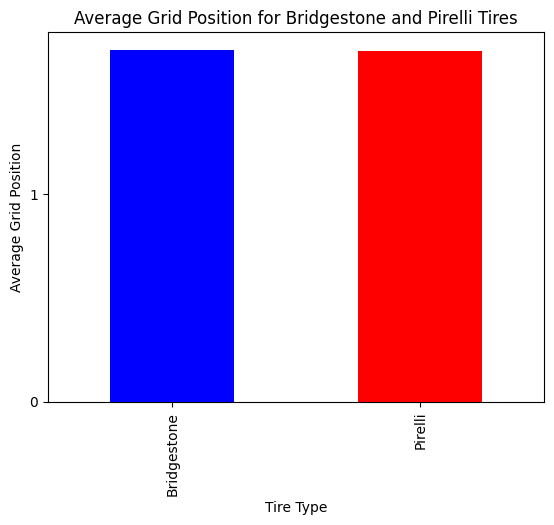

In [7]:
#I want to graph the grid positions to see if there are large differences in the averages
Lewis_tires = LewisHamilton_Stats[LewisHamilton_Stats['grid_position'].isin([1, 2, 3])]
average_grid_position = Lewis_tires.groupby('tyre')['grid_position'].mean()
average_grid_position.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Tire Type')
plt.ylabel('Average Grid Position')
plt.title('Average Grid Position for Bridgestone and Pirelli Tires')
plt.xticks(range(len(average_grid_position.index)), ['Bridgestone', 'Pirelli'])
plt.yticks(range(int(average_grid_position.max()) + 1))
plt.show()

In [8]:
#To show another angle, I check that the graph accurately shows the averages
Lewis_tires = LewisHamilton_Stats[LewisHamilton_Stats['grid_position'].isin([1, 2, 3])]
average_grid_position = Lewis_tires.groupby('tyre')['grid_position'].mean()
print(average_grid_position)

tyre
Bridgestone    1.694444
Pirelli        1.689266
Name: grid_position, dtype: float64


In [9]:
#I round up to make the numbers a little cleaner
Lewis_tires = LewisHamilton_Stats[LewisHamilton_Stats['grid_position'].isin([1, 2, 3])]
average_grid_position = Lewis_tires.groupby('tyre')['grid_position'].mean().round(2)
print(average_grid_position)

tyre
Bridgestone    1.69
Pirelli        1.69
Name: grid_position, dtype: float64


In [1]:
#To conclude the first question, Lewis does Equally as good with either Pirelli or Bridgestone Tires. 
#One could take away from this that the tire type plays no part in Lewis' success
#Next, I will see if there is a specific track that Lewis does particulalry well in, or poorly in

In [10]:
#I shrunk the data frame to just show the grand prix and grid position
Track_Comparrison = LewisHamilton_Stats[['grand_prix', 'grid_position']]
Track_Comparrison

,grand_prix,grid_position
0,Australia,4
1,Malaysia,4
2,Bahrain,2
3,Spain,4
4,Monaco,2
...,...,...
330,Las Vegas,10
331,Abu Dhabi,11
332,Bahrain,9
333,Saudi Arabia,8


In [54]:
#I then found how many times he has gotten a top 3 grid position at each race
top3_counts = LewisHamilton_Stats[LewisHamilton_Stats['grid_position'].isin([1, 2, 3])]
top3_counts = Track_Comparrison['grand_prix'].value_counts()
print(top3_counts)

Abu Dhabi           12
Belgium             12
Hungary             12
Spain               11
Italy               11
Canada              11
Australia           11
Japan               10
Bahrain             10
USA                 10
Britain              9
Singapore            9
Monaco               9
China                8
Brazil               7
Malaysia             6
Germany              5
Europe               5
Mexico               5
Russia               5
France               4
Azerbaijan           4
Turkey               3
Austria              3
South Korea          3
India                2
Styria               2
Portugal             2
Emilia-Romagna       2
Mexico City          2
Qatar                2
70th Anniversary     1
Tuscany              1
Eifel                1
Netherlands          1
Saudi Arabia         1
São Paulo            1
Name: grand_prix, dtype: int64


In [55]:
#I then calculated the total times each circuit was raced
grand_prix_counts = LewisHamilton_Stats['grand_prix'].value_counts()
print(grand_prix_counts)

Hungary             17
Bahrain             17
Spain               17
Belgium             17
Italy               17
Britain             17
Australia           16
Monaco              16
Japan               15
Abu Dhabi           15
Canada              14
Singapore           14
China               13
Brazil              13
USA                 12
Malaysia            11
Germany             10
Austria             10
Russia               8
Europe               7
Turkey               7
France               6
Azerbaijan           6
Mexico               5
South Korea          4
Saudi Arabia         4
India                3
Emilia-Romagna       3
Netherlands          3
Mexico City          3
São Paulo            3
Styria               2
Portugal             2
Qatar                2
Miami                2
70th Anniversary     1
Tuscany              1
Eifel                1
Las Vegas            1
Name: grand_prix, dtype: int64


In [70]:
# I then calculated the ratio of race count to the total number of top 3 positions
ratios = grand_prix_counts / top3_counts
ratios = ratios.dropna()
print(ratios)

70th Anniversary    1.000000
Abu Dhabi           1.250000
Australia           1.454545
Austria             3.333333
Azerbaijan          1.500000
Bahrain             1.700000
Belgium             1.416667
Brazil              1.857143
Britain             1.888889
Canada              1.272727
China               1.625000
Eifel               1.000000
Emilia-Romagna      1.500000
Europe              1.400000
France              1.500000
Germany             2.000000
Hungary             1.416667
India               1.500000
Italy               1.545455
Japan               1.500000
Malaysia            1.833333
Mexico              1.000000
Mexico City         1.500000
Monaco              1.777778
Netherlands         3.000000
Portugal            1.000000
Qatar               1.000000
Russia              1.600000
Saudi Arabia        4.000000
Singapore           1.555556
South Korea         1.333333
Spain               1.545455
Styria              1.000000
São Paulo           3.000000
Turkey        

In [71]:
#I then only chose the races he has raced every year to clean up the data a little bit
filtered_grand_prix_counts = grand_prix_counts[grand_prix_counts == 17]
ratios = filtered_grand_prix_counts / top3_counts
ratios = ratios.dropna()
print(ratios)

Bahrain    1.700000
Belgium    1.416667
Britain    1.888889
Hungary    1.416667
Italy      1.545455
Spain      1.545455
Name: grand_prix, dtype: float64


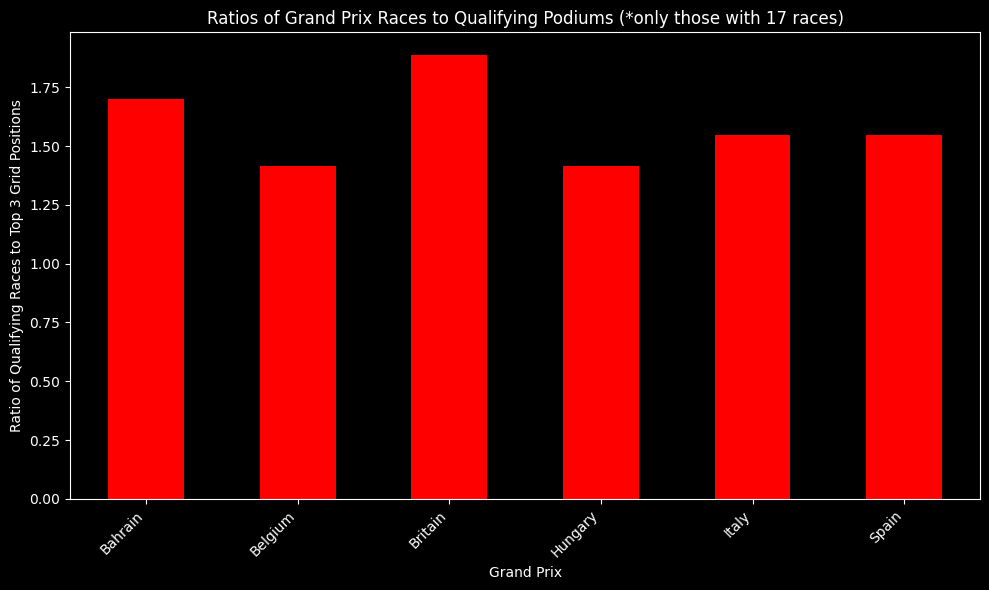

In [73]:
#I then graphed my findings to make it easier to visualize
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
ratios.plot(kind='bar', color='red')
plt.xlabel('Grand Prix', color='white')
plt.ylabel('Ratio of Qualifying Races to Top 3 Grid Positions', color='white')
plt.title('Ratios of Grand Prix Races to Qualifying Podiums (*only those with 17 races)', color='white')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()

In [68]:
#I wanted to find which track he did particulary well on but I narowed it down to only the tracks he has raced on every season
#He has the lowest ratio for Belgium and Hungary, this implies that these to tracks he races the best on when comparing his podium's to races done
#His highest ration was Britain which is where he performs the worst compared to this, ironically enough, he has the most race wins in britain but not the most grid positions
#I chose grid position because quallifying is an uninterrupted race where they compete by themselves for time so there are less variables to consider

In [126]:
#Next, I will see if on average, Lewis does better in the race compared to where he is placed in qualifying

In [127]:
#I make a copy of the data frame just in case because I will be manipulating some of the data
LewisHamilton_Stats_Copy = LewisHamilton_Stats.copy()
LewisHamilton_Stats_Copy

,race number,Year,grand_prix,team,driver_number,constructor,car,engine_type,tyre,grid_position,race_position,event
0,1,2007,Australia,Vodafone McLaren Mercedes,2,McLaren,MP4-22,Mercedes V8,Bridgestone,4,3,NaN
1,2,2007,Malaysia,Vodafone McLaren Mercedes,2,McLaren,MP4-22,Mercedes V8,Bridgestone,4,2,NaN
2,3,2007,Bahrain,Vodafone McLaren Mercedes,2,McLaren,MP4-22,Mercedes V8,Bridgestone,2,2,NaN
3,4,2007,Spain,Vodafone McLaren Mercedes,2,McLaren,MP4-22,Mercedes V8,Bridgestone,4,2,NaN
4,5,2007,Monaco,Vodafone McLaren Mercedes,2,McLaren,MP4-22,Mercedes V8,Bridgestone,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
330,331,2023,Las Vegas,Mercedes AMG Petronas F1 Team,44,Mercedes,F1 W14,Mercedes V6 t h,Pirelli,10,7,NaN
331,332,2023,Abu Dhabi,Mercedes AMG Petronas F1 Team,44,Mercedes,F1 W14,Mercedes V6 t h,Pirelli,11,9,NaN
332,333,2024,Bahrain,Mercedes AMG Petronas F1 Team,44,Mercedes,F1 W15,Mercedes V6 t h,Pirelli,9,7,NaN
333,334,2024,Saudi Arabia,Mercedes AMG Petronas F1 Team,44,Mercedes,F1 W15,Mercedes V6 t h,Pirelli,8,9,NaN


In [128]:
#I only fetch the columns for 'grid_position' and 'race_position'
Grid_vs_finish = LewisHamilton_Stats_Copy[['grid_position', 'race_position']]
Grid_vs_finish

,grid_position,race_position
0,4,3
1,4,2
2,2,2
3,4,2
4,2,2
...,...,...
330,10,7
331,11,9
332,9,7
333,8,9


In [129]:
# Filter out rows where 'race_position' is not 'ab' to clean up the data
Grid_vs_finish = Grid_vs_finish[Grid_vs_finish['race_position'] != 'ab']
Grid_vs_finish

,grid_position,race_position
0,4,3
1,4,2
2,2,2
3,4,2
4,2,2
...,...,...
329,5,8
330,10,7
331,11,9
332,9,7


In [135]:
#Show all of the rows where 'race_position' is a lower value than 'grid_position'
pd.options.mode.chained_assignment = None
Grid_vs_finish.loc[:, 'grid_position'] = pd.to_numeric(Grid_vs_finish['grid_position'], errors='coerce')
Grid_vs_finish.loc[:, 'race_position'] = pd.to_numeric(Grid_vs_finish['race_position'], errors='coerce')
Ratio_Filtered = Grid_vs_finish[Grid_vs_finish['grid_position'] > Grid_vs_finish['race_position']]
Ratio_Filtered

,grid_position,race_position
0,4,3.0
1,4,2.0
3,4,2.0
9,10,9.0
18,9,5.0
...,...,...
325,7,5.0
328,6,2.0
330,10,7.0
331,11,9.0


In [111]:
#Through these simulations, I have found that the number of races where Lewis did better than his starting position is 332, out of a totalt of 333 races.  This means that he essentially always does better to finish than where he starts.
#Lastly, we are only gonna show the results of qualifying (e.g. 'grid_position') for this due to less variables
#For the last part I am going to see with all of his grid positions if he has gotten better or worse overtime.

In [132]:
#I make a table only showing year, and grid_position
Performance_Over_Time = LewisHamilton_Stats[['Year', 'grid_position']]
Performance_Over_Time

,Year,grid_position
0,2007,4
1,2007,4
2,2007,2
3,2007,4
4,2007,2
...,...,...
330,2023,10
331,2023,11
332,2024,9
333,2024,8


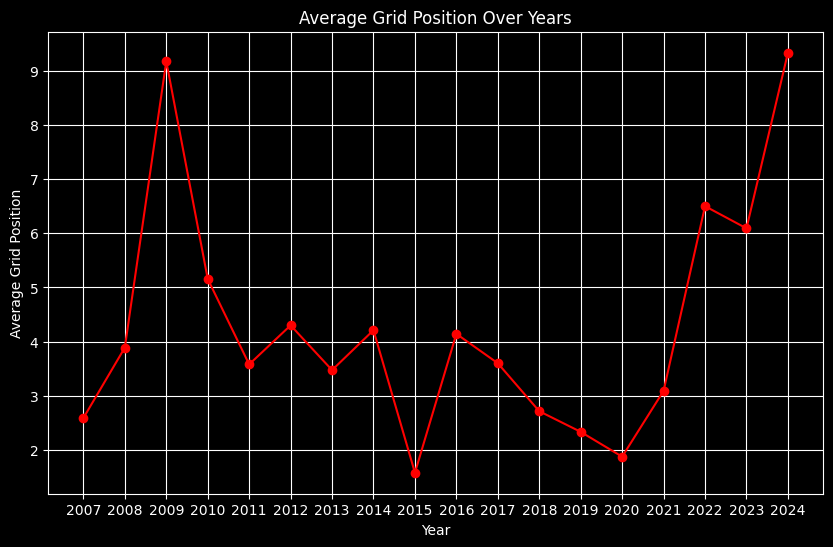

In [113]:
#I make a graph to show the average gfrid position that corresponds to every year
yearly_avg_grid_position = Performance_Over_Time.groupby('Year')['grid_position'].mean()
yearly_avg_grid_position = yearly_avg_grid_position.reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_grid_position['Year'], yearly_avg_grid_position['grid_position'], marker='o', color='red', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Grid Position')
plt.title('Average Grid Position Over Years')
plt.xticks(yearly_avg_grid_position['Year'], yearly_avg_grid_position['Year'].astype(int))
plt.grid(True)
plt.show()

In [114]:
#From this graph we can see thatthe average grid position has increased since the start of his career implying that his performance has gotten better than where it started.|

In [ ]:
#Overall from this project, I learned that the is no differencve in tires for Lewis' performance
#I learned that when comparing the tracks hes raced every year of his career, his two best were Hungary and Belgium, and his worst was Britain (*according to the ratios of races to podiums, not wins
#I learned that Lewis almost always does better in the finishing grid than he does in the starting grid
#Lastly, I learned that Lewis has progressed through his career and has gotten better over the span of his career